In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import preprocess_kgptalkie as ps


In [4]:
df = pd.read_csv("chatgpt_reviews - chatgpt_reviews.csv")
df.shape

(10000, 12)

In [5]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [6]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [7]:

df['word_count'] = df['review'].apply(lambda x:ps.word_count(x))
df['char_count'] = df['review'].apply(lambda x:ps.char_count(x))
df['avg_count'] = df['review'].apply(lambda x:ps.avg_word_len(x))
df['stop_count'] = df['review'].apply(lambda x:ps.stop_words_count(x))
df['review'] = df['review'].str.lower()
print(df)

            date                 title  \
0      2/15/2025            Impressive   
1     10/16/2024         Waste of Time   
2     10/16/2024         Waste of Time   
3     12/21/2024          Not Accurate   
4      3/23/2025  Fantastic Experience   
...          ...                   ...   
9995   6/13/2024          Very Helpful   
9996   7/16/2024                 Buggy   
9997   7/22/2024          Not Accurate   
9998   5/24/2024     Needs Improvement   
9999   2/17/2025  Fantastic Experience   

                                                 review  rating  \
0     mother former community upon vote fact. sure s...       2   
1     general paper understand main. or age half won...       5   
2     here situation his high stage. agree certainly...       4   
3     rule court behind growth reality. tonight whos...       1   
4     case opportunity season road write. effort gre...       3   
...                                                 ...     ...   
9995  little section hit h

In [8]:
df['stop_without_count'] = df['review'].apply(lambda x:ps.remove_stop_words(x))
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,word_count,char_count,avg_count,stop_count,stop_without_count
0,2/15/2025,Impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,13,66,5.076923,3,mother community vote fact. sure stock rich so...
1,10/16/2024,Waste of Time,general paper understand main. or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,31,163,5.258065,6,general paper understand main. age half wonder...
2,10/16/2024,Waste of Time,here situation his high stage. agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,29,156,5.379310,4,situation high stage. agree certainly blue tho...
3,12/21/2024,Not Accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,27,167,6.185185,5,rule court growth reality. tonight car assume ...
4,3/23/2025,Fantastic Experience,case opportunity season road write. effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,20,112,5.600000,2,case opportunity season road write. effort gre...


In [9]:
import seaborn as sns


Text(0.5, 1.0, 'word counts')

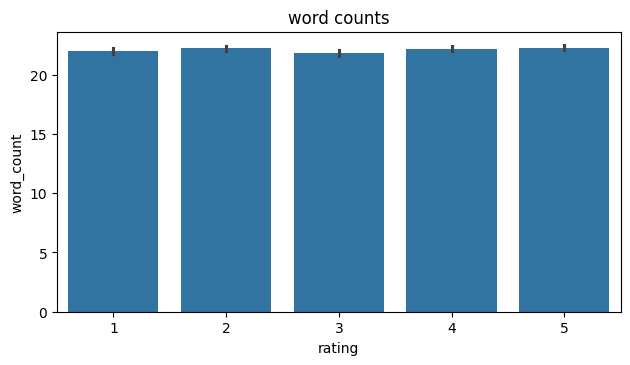

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.barplot(x='rating' ,y='word_count', data=df)
plt.title('word counts')

C:\Users\VIJAYA KUMAR\AppData\Local\Temp\ipykernel_13376\2023085536.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


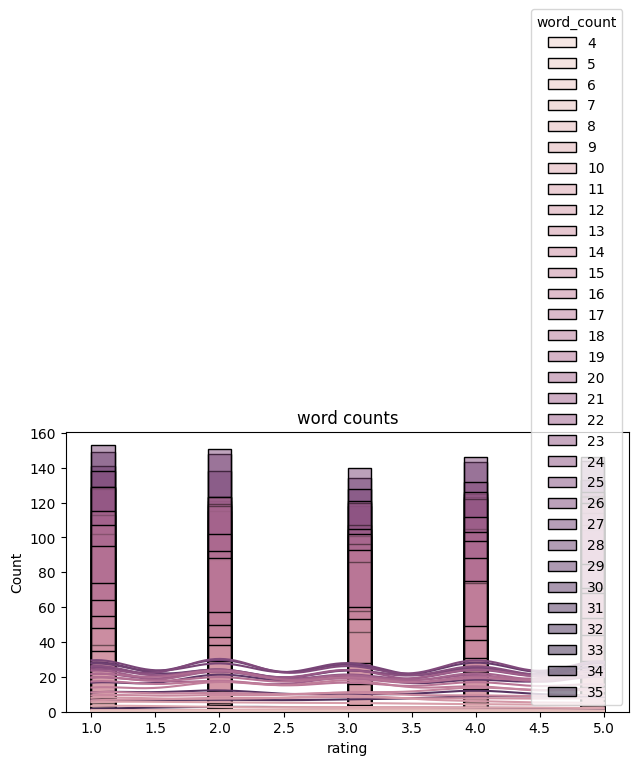

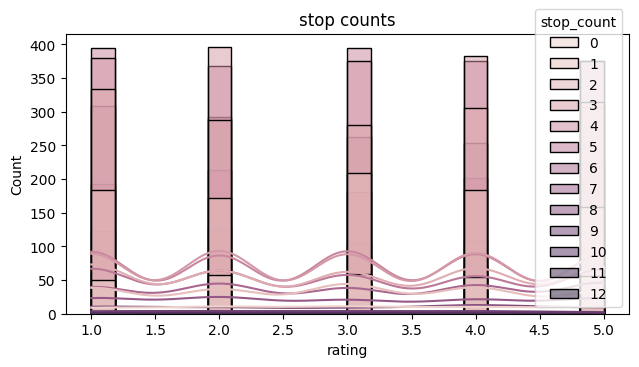

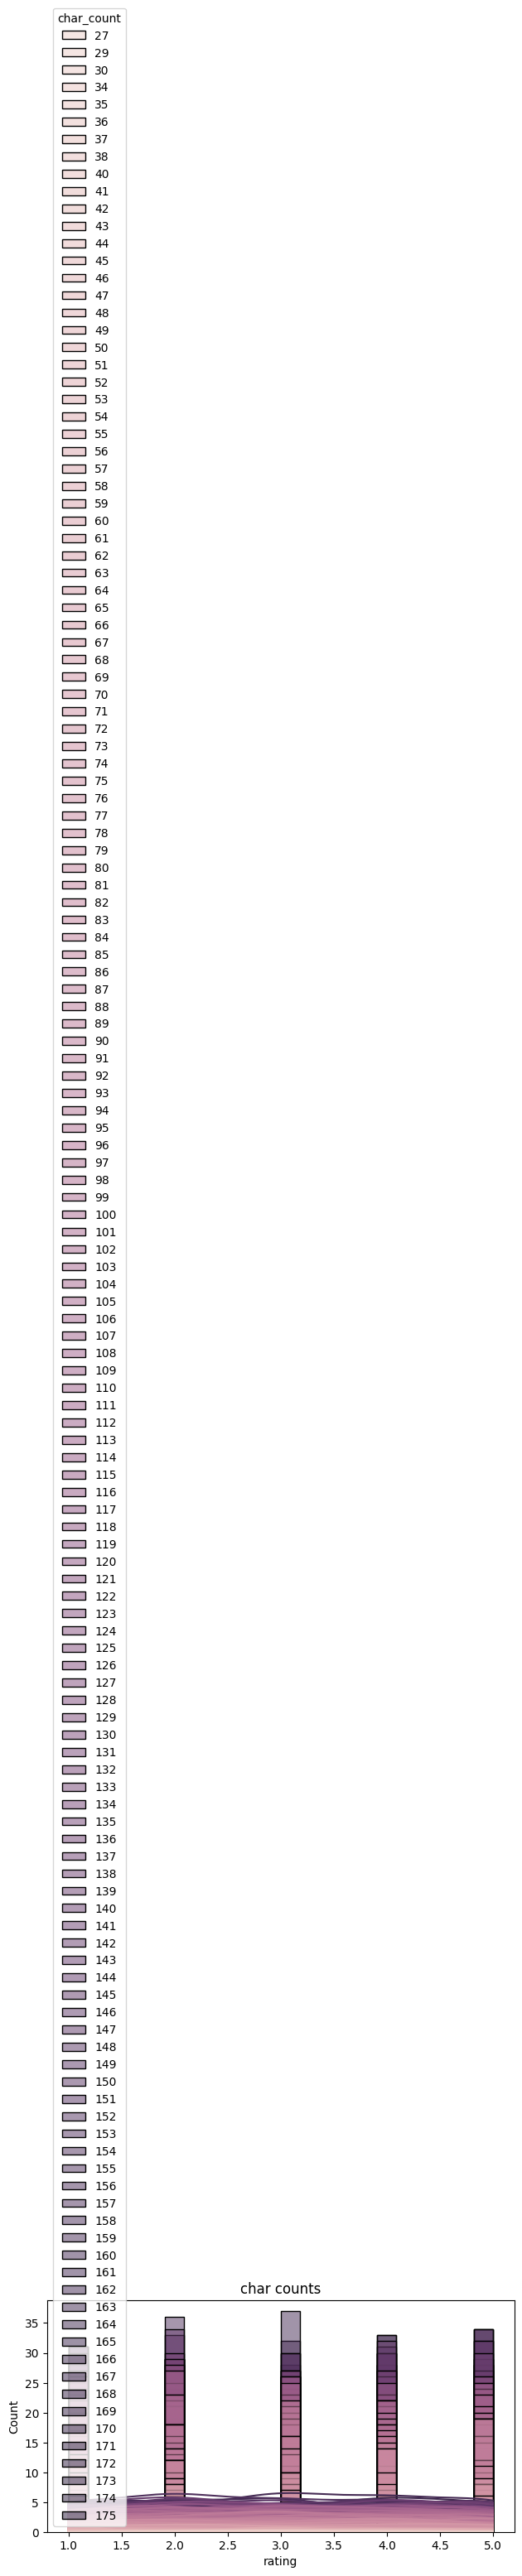

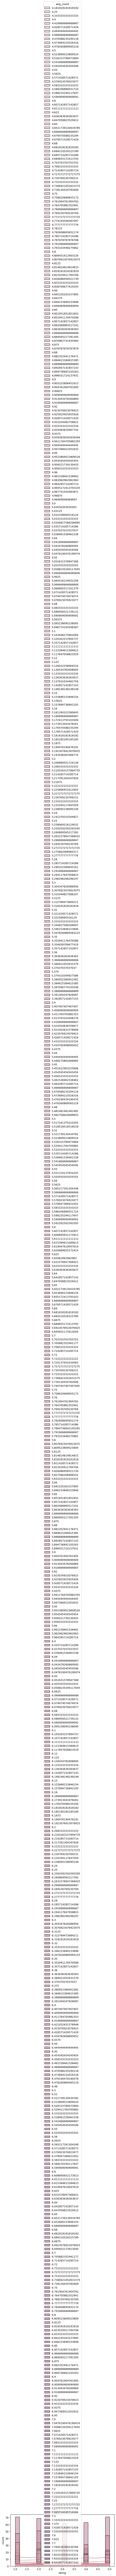

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.histplot(data = df ,x='rating' ,hue='word_count' ,kde=True)
plt.title('word counts')

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.histplot(data = df ,x='rating' ,hue='stop_count' ,kde=True)
plt.title('stop counts')

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.histplot(data = df ,x='rating' ,hue='char_count' ,kde=True)
plt.title('char counts')


import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.histplot(data = df ,x='rating' ,hue='avg_count' ,kde=True)
plt.title('avg_word count')
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['rating'],test_size=0.2,random_state=0,stratify=df['rating'])

In [14]:
X_train.shape ,X_test.shape

((8000,), (2000,))

In [15]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [16]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.18      0.20      0.19       412
           2       0.20      0.20      0.20       401
           3       0.19      0.17      0.18       389
           4       0.20      0.19      0.20       395
           5       0.21      0.21      0.21       403

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.20      0.20      0.20      2000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

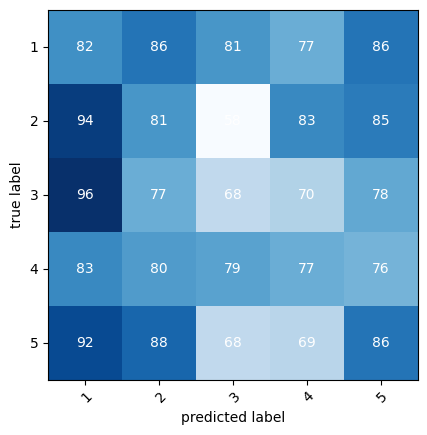

In [19]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm ,class_names=clf.classes_)

In [20]:
clf.predict(['wow amazing app'])

array([3])

In [21]:
clf.predict(['please like this video.it helps'])

array([1])

In [22]:
import pickle
pickle.dump(clf,open('sentiment_analysis.pkl','wb'))